In [113]:
! pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
! pip install plotly
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [123]:
time_period = "5y"

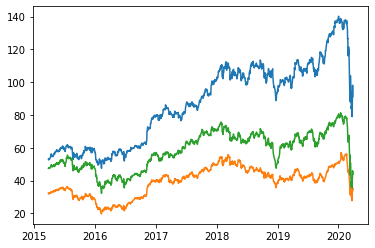

In [124]:
banks = yf.Tickers('jpm ms c')
tech = yf.Tickers('msft aapl goog')

# historical_prices = pd.concat([banks.tickers.JPM.history(period=time_period)['Close'].rename("JPM"), banks.tickers.MS.history(period=time_period)['Close'].rename("MS"),banks.tickers.C.history(period=time_period)['Close'].rename("CITI")], axis = 1, sort=False)
historical_prices = pd.concat([banks.tickers.JPM.history(period=time_period)['Close'].rename("JPM"), banks.tickers.MS.history(period=time_period)['Close'].rename("MS"),banks.tickers.C.history(period=time_period)['Close'].rename("CITI")], axis = 1, sort=False)

plt.plot(historical_prices);

In [125]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=historical_prices.index,
                y = historical_prices["CITI"],
                name = "JPM",
                line_color='deepskyblue',
                opacity=0.8))
fig.add_trace(go.Scatter(
                x=historical_prices.index,
                y=historical_prices['MS'],
                name="MS",
                line_color='dimgray',
                opacity=0.8))
fig.show()

In [126]:
fig = px.scatter(x=historical_prices["CITI"], y=historical_prices["MS"])
fig.show()


# Testing for Cointegration
Source: https://robotwealth.com/practical-pairs-trading/

In [127]:
historical_prices.dropna(inplace=True)
model = sm.OLS(historical_prices["MS"], historical_prices["CITI"]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     MS   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.701e+05
Date:                Sun, 29 Mar 2020   Prob (F-statistic):                        0.00
Time:                        01:30:02   Log-Likelihood:                         -3062.1
No. Observations:                1259   AIC:                                      6126.
Df Residuals:                    1258   BIC:                                      6131.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CITI           0.6799      0.001    519.747      0.000       0.677       0.683
==============================================================================
Omnibus:                       50.697   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.793
Skew:                           0.475   Prob(JB):                     3.44e-12
Kurtosis:                       2.678   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
hedge = model.params.values[0]
spread = (historical_prices["MS"] - hedge*historical_prices["CITI"]).rename("spread", inplace = True)
spread
fig = px.line(x=spread.index,y=spread)
fig.show()

In [129]:
def check_stationarity(X, cutoff=0.05):
    p_value = adfuller(X)[1]
    print("p-value is "+str(p_value))
    if p_value < cutoff:
        print("The null hypothesis that the series "+X.name +" is non-stationary has been rejected")
    else:
        print("The null hypothesis that the series "+ X.name +" is non-stationary has NOT been rejected")


In [131]:
check_stationarity(spread)

p-value is 0.1511462854290243
The null hypothesis that the series spread is non-stationary has NOT been rejected
